In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("D:\\DATASETS\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['User ID','Purchased'],axis=1),df['Purchased'],test_size=0.3,random_state=56)

In [18]:
X_train

,Gender,Age,EstimatedSalary
313,1,49,141000
18,0,46,28000
40,1,27,17000
54,1,27,58000
189,0,28,32000
...,...,...,...
142,0,35,59000
122,1,40,75000
235,0,46,79000
192,0,29,43000


In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [27]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [30]:
np.round(X_train.describe(),3)

,Gender,Age,EstimatedSalary
count,280.000,280.000,280.000
mean,0.511,38.296,70975.000
std,0.501,10.753,34089.847
min,0.000,18.000,15000.000
25%,0.000,30.000,45750.000
50%,1.000,37.500,71000.000
75%,1.000,46.250,88000.000
max,1.000,60.000,150000.000


In [31]:
np.round(X_train_scaled.describe(),3)

,Gender,Age,EstimatedSalary
count,280.000,280.000,280.000
mean,0.000,0.000,-0.000
std,1.002,1.002,1.002
min,-1.022,-1.891,-1.645
25%,-1.022,-0.773,-0.741
50%,0.979,-0.074,0.001
75%,0.979,0.741,0.500
max,0.979,2.022,2.322


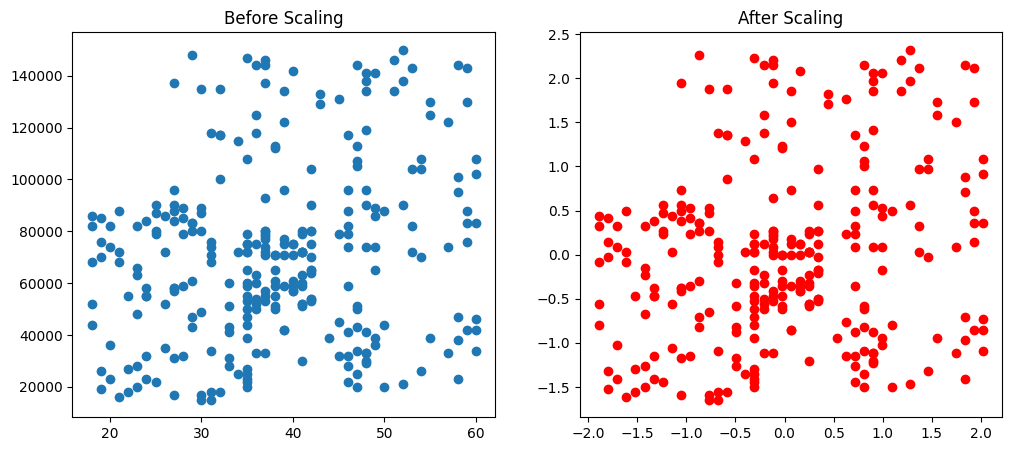

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scalled=LogisticRegression()

In [41]:
lr.fit(X_train,y_train)
lr_scalled.fit(X_train_scaled,y_train)

LogisticRegression()

In [42]:
y_pred=lr.predict(X_test)
y_scalled_pred=lr_scalled.predict(X_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score

In [45]:
print("Actual Score:",accuracy_score(y_test,y_pred))
print("Saclled Score:",accuracy_score(y_test,y_scalled_pred))

Actual Score: 0.8166666666666667
Saclled Score: 0.8083333333333333
